In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
# Convert the data to Tensor
transform = transforms.ToTensor()

### Load the CIFAR10 dataset

In [5]:
# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### MLP Model

In [81]:
class Cifar(nn.Module):
    """
    A simple neural network for classifying FashionMNIST Images. The network has 2 fully connected layers with ReLU activation and
    a final layer with 10 output categories.
    """
    def __init__(self, hidden_dim):
        super(CifarNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 *3, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.final_layer = nn.Linear(hidden_dim, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.final_layer(x)
        
        return x

### Training function

In [82]:
def train_nn(model, train_loader, criterion, optimizer, device):
    """Function to train the neural network for one epoch"""
    model.train()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted_labels = torch.argmax(outputs, dim=1)
        total_labels += labels.size(0)
        correct_labels += torch.sum(predicted_labels == labels).item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_labels / total_labels
    
    return train_loss, train_accuracy

### Evaluation Function

In [83]:
def evaluate_nn(model, test_loader, criterion, device):
    """
    Function to evaluate the neural network on the test data.
    """
    model.eval()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            predicted_labels = torch.argmax(outputs, dim=1)
            total_labels += labels.size(0)
            correct_labels += torch.sum(predicted_labels == labels).item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = correct_labels / total_labels
    return test_loss, test_accuracy

### Training MLP

In [84]:
def run_training(hidden_dim, lr, num_epochs):
    """
    Function to train and evaluate the model for a given number of epochs.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CifarNN(hidden_dim).to(device)                    # Initialize model
        
    criterion = nn.CrossEntropyLoss()                           # Loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)            # Optimizer

    train_losses = []
    test_losses = []
    
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    # Returns the model metrics.
    return model, train_losses, train_accuracies, test_losses, test_accuracies

In [17]:
hidden_dim = 128
lr = 0.001
num_epochs = 20

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies = run_training(hidden_dim, lr, num_epochs)


  8%|███▋                                        | 1/12 [00:18<03:24, 18.57s/it]

Epoch 1/12
Train Loss: 1.8581, Train Acc: 0.3226
Test Loss: 1.7481, Test Acc: 0.3584


 17%|███████▎                                    | 2/12 [00:39<03:18, 19.82s/it]

Epoch 2/12
Train Loss: 1.7108, Train Acc: 0.3838
Test Loss: 1.6482, Test Acc: 0.4038


 25%|███████████                                 | 3/12 [00:59<03:01, 20.17s/it]

Epoch 3/12
Train Loss: 1.6495, Train Acc: 0.4057
Test Loss: 1.6168, Test Acc: 0.4189


 33%|██████████████▋                             | 4/12 [01:20<02:42, 20.32s/it]

Epoch 4/12
Train Loss: 1.6017, Train Acc: 0.4245
Test Loss: 1.6025, Test Acc: 0.4332


 42%|██████████████████▎                         | 5/12 [01:40<02:22, 20.40s/it]

Epoch 5/12
Train Loss: 1.5760, Train Acc: 0.4320
Test Loss: 1.5563, Test Acc: 0.4461


 50%|██████████████████████                      | 6/12 [02:01<02:02, 20.45s/it]

Epoch 6/12
Train Loss: 1.5553, Train Acc: 0.4416
Test Loss: 1.5333, Test Acc: 0.4563


 58%|█████████████████████████▋                  | 7/12 [02:22<01:42, 20.49s/it]

Epoch 7/12
Train Loss: 1.5413, Train Acc: 0.4438
Test Loss: 1.5783, Test Acc: 0.4316


 67%|█████████████████████████████▎              | 8/12 [02:42<01:22, 20.52s/it]

Epoch 8/12
Train Loss: 1.5300, Train Acc: 0.4523
Test Loss: 1.5470, Test Acc: 0.4427


 75%|█████████████████████████████████           | 9/12 [03:03<01:01, 20.52s/it]

Epoch 9/12
Train Loss: 1.5186, Train Acc: 0.4562
Test Loss: 1.5575, Test Acc: 0.4403


 83%|███████████████████████████████████▊       | 10/12 [03:23<00:41, 20.53s/it]

Epoch 10/12
Train Loss: 1.5105, Train Acc: 0.4583
Test Loss: 1.5500, Test Acc: 0.4449


 92%|███████████████████████████████████████▍   | 11/12 [03:44<00:20, 20.53s/it]

Epoch 11/12
Train Loss: 1.4981, Train Acc: 0.4630
Test Loss: 1.5434, Test Acc: 0.4462


100%|███████████████████████████████████████████| 12/12 [04:04<00:00, 20.40s/it]

Epoch 12/12
Train Loss: 1.4943, Train Acc: 0.4642
Test Loss: 1.5339, Test Acc: 0.4510


### CNN Model

In [85]:
# Simple CNN Model
class CNN(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### Custom Learning Rate Scheduler

In [86]:
def custom_lr_scheduler(optimizer, epoch, init_lr=0.1, warmup_epochs=5, decay_rate=0.5, decay_epochs=10):
    """Custom LR scheduler with warmup and decay"""
    if epoch < warmup_epochs:
        lr = init_lr * (epoch + 1) / warmup_epochs
    else:
        lr = init_lr * (decay_rate ** ((epoch - warmup_epochs) // decay_epochs))
    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

### Training for CNN
Includes arguments for dropout and weight decay(L2 Regularization). The function is modified from the previous run_training function used in MLP

In [87]:
# Training and Evaluation Function
def run_training(hidden_dim, lr, num_epochs, dropout_rate=0.3, weight_decay=1e-4):
    """
    Function to train and evaluate the CNN model for a given number of epochs with custom LR scheduling, dropout, and weight decay.
    """

    # Initialize device and model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN(dropout_rate=dropout_rate).to(device)

    # Loss function and optimizer with weight decay for L2 regularization
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Lists to store training metrics
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    learning_rates = []  # List to store learning rates for each epoch

    # Training loop with custom LR scheduling
    for epoch in tqdm(range(num_epochs)):
        # Update learning rate using the custom scheduler and store it
        current_lr = custom_lr_scheduler(optimizer, epoch, init_lr=lr)
        learning_rates.append(current_lr)

        # Training step
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        
        # Evaluation step
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        # Save metrics for analysis
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print epoch summary
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"LR: {current_lr:.6f}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    # Return model and training metrics
    return model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates

### Training with dropout and weight decay (L2 Regularization)

In [88]:
# Example of calling the function with parameters
hidden_dim = 128
lr = 0.001
num_epochs = 20
dropout_rate = 0.3
weight_decay = 1e-4

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  5%|███████▍                                                                                                                                            | 1/20 [00:46<14:50, 46.89s/it]

Epoch 1/20
LR: 0.000200, Train Loss: 1.7293, Train Acc: 0.3718
Test Loss: 1.4523, Test Acc: 0.4819


 10%|██████████████▊                                                                                                                                     | 2/20 [01:38<14:53, 49.65s/it]

Epoch 2/20
LR: 0.000400, Train Loss: 1.4257, Train Acc: 0.4856
Test Loss: 1.2382, Test Acc: 0.5605


 15%|██████████████████████▏                                                                                                                             | 3/20 [02:35<14:58, 52.85s/it]

Epoch 3/20
LR: 0.000600, Train Loss: 1.2738, Train Acc: 0.5443
Test Loss: 1.0931, Test Acc: 0.6231


 20%|█████████████████████████████▌                                                                                                                      | 4/20 [03:36<14:58, 56.18s/it]

Epoch 4/20
LR: 0.000800, Train Loss: 1.1720, Train Acc: 0.5817
Test Loss: 1.0343, Test Acc: 0.6367


 25%|█████████████████████████████████████                                                                                                               | 5/20 [04:34<14:13, 56.93s/it]

Epoch 5/20
LR: 0.001000, Train Loss: 1.1124, Train Acc: 0.6065
Test Loss: 0.9779, Test Acc: 0.6549


 30%|████████████████████████████████████████████▍                                                                                                       | 6/20 [05:29<13:05, 56.11s/it]

Epoch 6/20
LR: 0.001000, Train Loss: 1.0438, Train Acc: 0.6328
Test Loss: 0.9229, Test Acc: 0.6833


 35%|███████████████████████████████████████████████████▊                                                                                                | 7/20 [06:28<12:23, 57.17s/it]

Epoch 7/20
LR: 0.001000, Train Loss: 0.9982, Train Acc: 0.6472
Test Loss: 0.8953, Test Acc: 0.6949


 40%|███████████████████████████████████████████████████████████▏                                                                                        | 8/20 [07:30<11:45, 58.79s/it]

Epoch 8/20
LR: 0.001000, Train Loss: 0.9517, Train Acc: 0.6637
Test Loss: 0.8838, Test Acc: 0.6921


 45%|██████████████████████████████████████████████████████████████████▌                                                                                 | 9/20 [08:25<10:32, 57.51s/it]

Epoch 9/20
LR: 0.001000, Train Loss: 0.9213, Train Acc: 0.6724
Test Loss: 0.8785, Test Acc: 0.6948


 50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 10/20 [09:25<09:41, 58.14s/it]

Epoch 10/20
LR: 0.001000, Train Loss: 0.8947, Train Acc: 0.6830
Test Loss: 0.8244, Test Acc: 0.7172


 55%|████████████████████████████████████████████████████████████████████████████████▊                                                                  | 11/20 [10:27<08:54, 59.37s/it]

Epoch 11/20
LR: 0.001000, Train Loss: 0.8747, Train Acc: 0.6914
Test Loss: 0.8118, Test Acc: 0.7243


 60%|████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 12/20 [11:29<08:02, 60.29s/it]

Epoch 12/20
LR: 0.001000, Train Loss: 0.8492, Train Acc: 0.7009
Test Loss: 0.8335, Test Acc: 0.7122


 65%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 13/20 [12:37<07:18, 62.71s/it]

Epoch 13/20
LR: 0.001000, Train Loss: 0.8315, Train Acc: 0.7069
Test Loss: 0.8251, Test Acc: 0.7209


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 14/20 [13:48<06:30, 65.00s/it]

Epoch 14/20
LR: 0.001000, Train Loss: 0.8160, Train Acc: 0.7125
Test Loss: 0.8271, Test Acc: 0.7143


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 15/20 [14:51<05:22, 64.59s/it]

Epoch 15/20
LR: 0.001000, Train Loss: 0.8009, Train Acc: 0.7160
Test Loss: 0.7929, Test Acc: 0.7281


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 16/20 [15:53<04:15, 63.82s/it]

Epoch 16/20
LR: 0.000500, Train Loss: 0.7065, Train Acc: 0.7496
Test Loss: 0.7230, Test Acc: 0.7538


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 17/20 [17:02<03:15, 65.26s/it]

Epoch 17/20
LR: 0.000500, Train Loss: 0.6782, Train Acc: 0.7596
Test Loss: 0.7209, Test Acc: 0.7571


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 18/20 [18:05<02:08, 64.50s/it]

Epoch 18/20
LR: 0.000500, Train Loss: 0.6584, Train Acc: 0.7645
Test Loss: 0.7143, Test Acc: 0.7539


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [19:03<01:02, 62.77s/it]

Epoch 19/20
LR: 0.000500, Train Loss: 0.6429, Train Acc: 0.7725
Test Loss: 0.7049, Test Acc: 0.7577


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [19:58<00:00, 59.94s/it]

Epoch 20/20
LR: 0.000500, Train Loss: 0.6284, Train Acc: 0.7769
Test Loss: 0.6985, Test Acc: 0.7599


### Plot metric curves

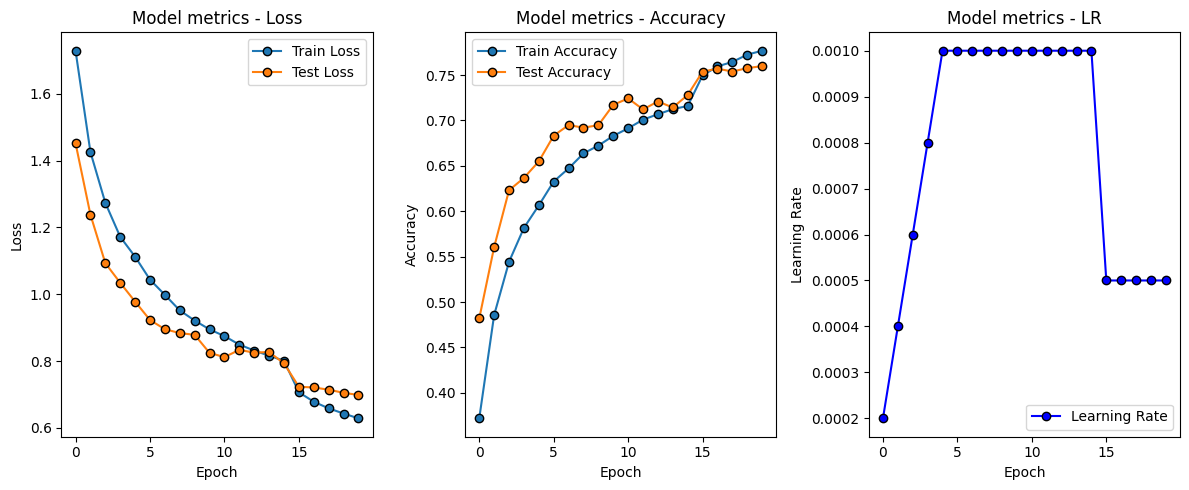

In [89]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

### Without dropuout and weight decay

In [ ]:
dropout_rate = 0.0
weight_decay = 0
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  5%|███████▍                                                                                                                                            | 1/20 [00:53<17:03, 53.89s/it]

Epoch 1/20
LR: 0.000200, Train Loss: 1.5988, Train Acc: 0.4195
Test Loss: 1.3368, Test Acc: 0.5257


 10%|██████████████▊                                                                                                                                     | 2/20 [01:54<17:22, 57.94s/it]

Epoch 2/20
LR: 0.000400, Train Loss: 1.2587, Train Acc: 0.5484
Test Loss: 1.1484, Test Acc: 0.5795


 15%|██████████████████████▏                                                                                                                             | 3/20 [02:45<15:33, 54.90s/it]

Epoch 3/20
LR: 0.000600, Train Loss: 1.0785, Train Acc: 0.6183
Test Loss: 1.0084, Test Acc: 0.6485


 20%|█████████████████████████████▌                                                                                                                      | 4/20 [03:44<15:03, 56.46s/it]

Epoch 4/20
LR: 0.000800, Train Loss: 0.9557, Train Acc: 0.6652
Test Loss: 0.9655, Test Acc: 0.6596


 25%|█████████████████████████████████████                                                                                                               | 5/20 [04:43<14:16, 57.12s/it]

Epoch 5/20
LR: 0.001000, Train Loss: 0.8611, Train Acc: 0.6986
Test Loss: 0.9432, Test Acc: 0.6726


 30%|████████████████████████████████████████████▍                                                                                                       | 6/20 [05:43<13:33, 58.10s/it]

Epoch 6/20
LR: 0.001000, Train Loss: 0.7489, Train Acc: 0.7380
Test Loss: 0.9447, Test Acc: 0.6745


 35%|███████████████████████████████████████████████████▊                                                                                                | 7/20 [06:42<12:39, 58.39s/it]

Epoch 7/20
LR: 0.001000, Train Loss: 0.6482, Train Acc: 0.7720
Test Loss: 0.9051, Test Acc: 0.6960


 40%|███████████████████████████████████████████████████████████▏                                                                                        | 8/20 [07:46<12:03, 60.32s/it]

Epoch 8/20
LR: 0.001000, Train Loss: 0.5605, Train Acc: 0.8025
Test Loss: 0.9603, Test Acc: 0.7044


 45%|██████████████████████████████████████████████████████████████████▌                                                                                 | 9/20 [08:44<10:55, 59.61s/it]

Epoch 9/20
LR: 0.001000, Train Loss: 0.4804, Train Acc: 0.8296
Test Loss: 0.9947, Test Acc: 0.6947


 50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 10/20 [09:43<09:54, 59.44s/it]

Epoch 10/20
LR: 0.001000, Train Loss: 0.4062, Train Acc: 0.8545
Test Loss: 1.0498, Test Acc: 0.7031


 55%|████████████████████████████████████████████████████████████████████████████████▊                                                                  | 11/20 [10:43<08:55, 59.47s/it]

Epoch 11/20
LR: 0.001000, Train Loss: 0.3427, Train Acc: 0.8783
Test Loss: 1.1744, Test Acc: 0.6905


 60%|████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 12/20 [11:47<08:07, 60.95s/it]

Epoch 12/20
LR: 0.001000, Train Loss: 0.2862, Train Acc: 0.8976
Test Loss: 1.2178, Test Acc: 0.7012


 65%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 13/20 [12:44<06:58, 59.72s/it]

Epoch 13/20
LR: 0.001000, Train Loss: 0.2442, Train Acc: 0.9134
Test Loss: 1.4048, Test Acc: 0.6824


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 14/20 [13:49<06:08, 61.34s/it]

Epoch 14/20
LR: 0.001000, Train Loss: 0.2050, Train Acc: 0.9279
Test Loss: 1.4812, Test Acc: 0.6950


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 15/20 [14:53<05:10, 62.13s/it]

Epoch 15/20
LR: 0.001000, Train Loss: 0.1789, Train Acc: 0.9380
Test Loss: 1.7147, Test Acc: 0.6845


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 16/20 [16:01<04:15, 64.00s/it]

Epoch 16/20
LR: 0.000500, Train Loss: 0.0728, Train Acc: 0.9771
Test Loss: 1.8046, Test Acc: 0.6990


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 17/20 [17:10<03:16, 65.39s/it]

Epoch 17/20
LR: 0.000500, Train Loss: 0.0509, Train Acc: 0.9842
Test Loss: 1.9580, Test Acc: 0.6987


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 18/20 [18:14<02:09, 64.92s/it]

Epoch 18/20
LR: 0.000500, Train Loss: 0.0411, Train Acc: 0.9870
Test Loss: 2.1141, Test Acc: 0.7000


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [19:23<01:06, 66.13s/it]

Epoch 19/20
LR: 0.000500, Train Loss: 0.0352, Train Acc: 0.9888
Test Loss: 2.2238, Test Acc: 0.6947


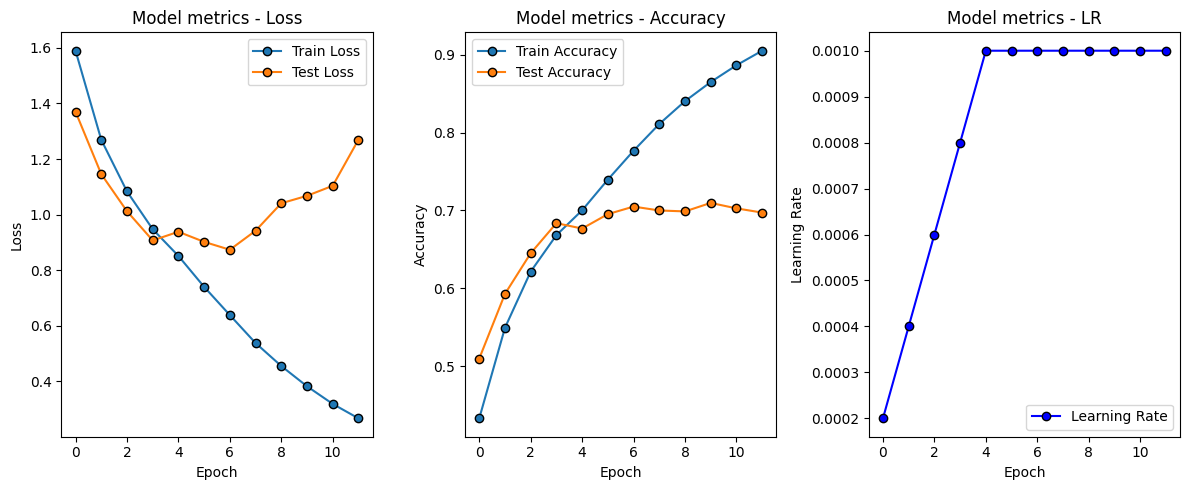

In [25]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

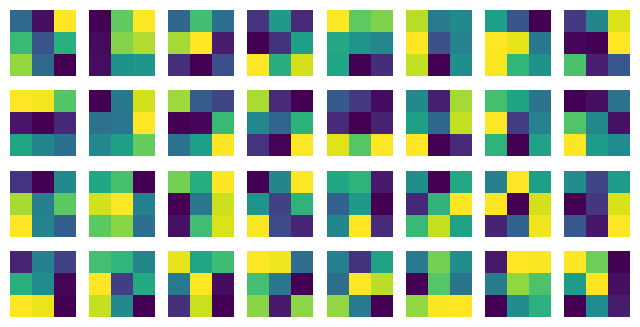

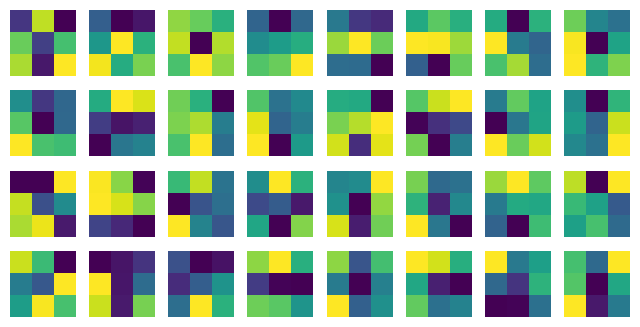

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


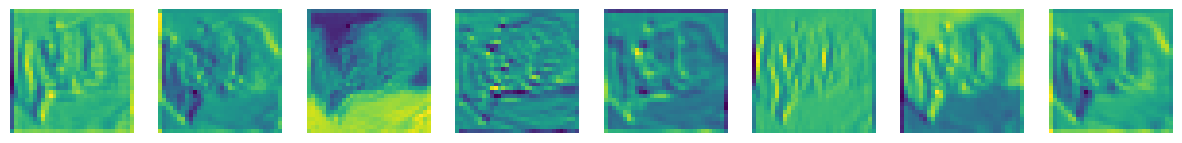

In [80]:
# Function to visualize convolutional kernels (weights)
def visualize_kernels(layer):
    kernels = layer.weight.data.cpu().numpy()
    fig, axs = plt.subplots(4, 8, figsize=(8, 4))
    for i, ax in enumerate(axs.flat):
        if i < kernels.shape[0]:
            ax.imshow(kernels[i, 0, :, :])
            ax.axis('off')
    plt.show()

# Function to visualize feature maps
def visualize_feature_maps(model, images):
    x = images.to('cpu')
    for name, layer in model.named_children():
        x = layer(x)
        if isinstance(layer, nn.Conv2d):
            print(layer)
            plt.figure(figsize=(15, 15))
            feature_maps = x[0].detach().cpu().numpy()
            for i in range(8):  # Display first 8 feature maps
                plt.subplot(1, 8, i + 1)
                plt.imshow(feature_maps[i])
                plt.axis('off')
            plt.show()
            break  # Visualize first conv layer only

# Visualize CNN convolutional kernels and feature maps
visualize_kernels(model.conv1)
visualize_kernels(model.conv2)
data_iter = iter(test_loader)
images, _ = next(data_iter)
visualize_feature_maps(model, images)

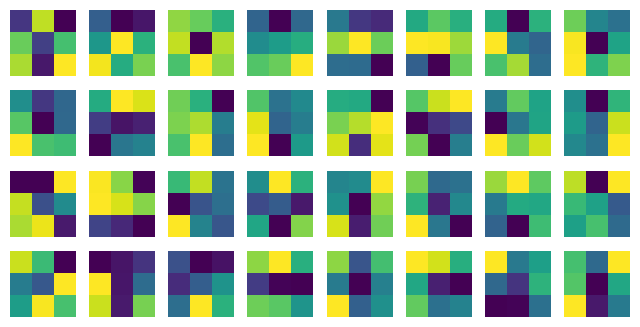

In [46]:
from torchvision import utils

In [69]:
# https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    """
    Visualizes tensor as an image grid. Can display all kernels or a specific channel.
    
    Args:
        tensor (torch.Tensor): The input tensor to visualize, assumed to be of shape (n, c, w, h).
        ch (int): Specific channel to display if `allkernels` is False.
        allkernels (bool): If True, visualizes all channels. If False, visualizes the specified channel.
        nrow (int): Number of images in each row of the grid.
        padding (int): Padding between images in the grid.
    """
    n, c, w, h = tensor.shape

    # If allkernels is True, flatten all channels except RGB (c == 3)
    if allkernels and c != 3:
        tensor = tensor.view(n * c, -1, w, h)
    elif c != 3:
        tensor = tensor[:, ch, :, :].unsqueeze(dim=1)  # Select only one channel if not RGB

    # Determine the number of rows for the plot
    rows = np.min((tensor.shape[0] // nrow + 1, 64))

    # Create grid
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    
    # Plot grid (for RGB, we keep it as is; for grayscale, plt handles single-channel display)
    plt.figure(figsize=(nrow, rows))
    if c == 3:
        plt.imshow(grid.permute(1, 2, 0).cpu().numpy())  # RGB
    else:
        plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)), cmap="gray")  # Grayscale for single channel
    plt.axis("off")
    plt.show()

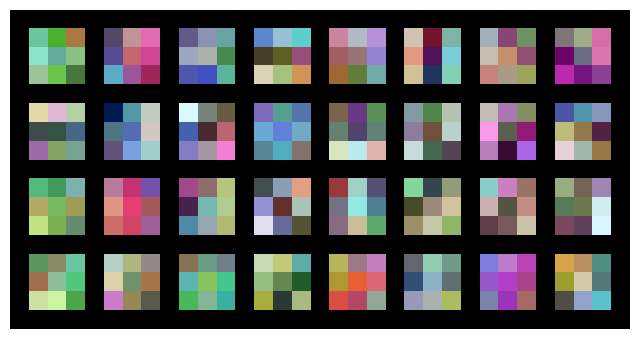

In [73]:
visTensor(model.conv1.weight.data, allkernels=True, nrow=8)

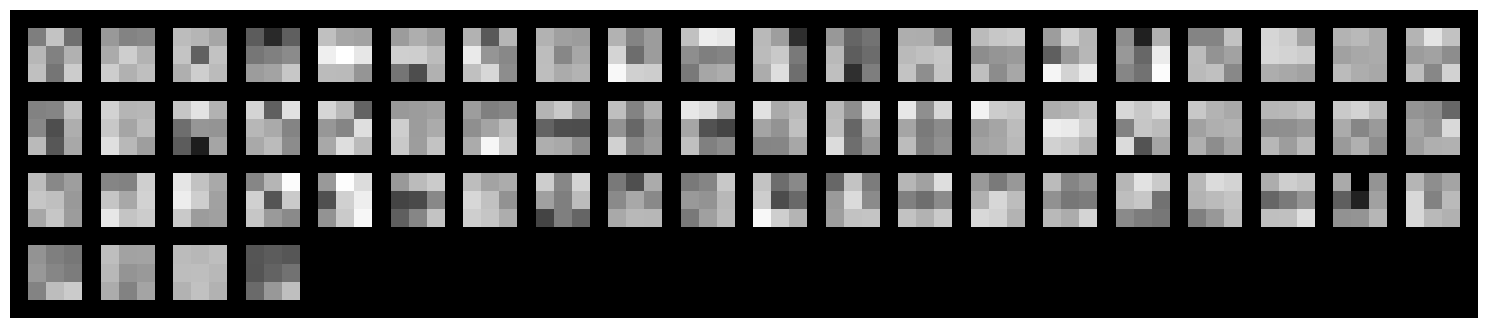

In [74]:
visTensor(model.conv2.weight.data, allkernels=False, nrow=20)